In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import scipy
from scipy.stats import norm
from scipy.signal import argrelextrema
import os, glob

In [1]:
def get_amplitudes(folder):
    num_traces = len([entry for entry in os.listdir(folder) if os.path.isfile(os.path.join(folder, entry))])
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    
    avg_maxes_ch1 = []
    counter = 0
    for f in csv_files:
        
        print(counter, f)
        data = pd.read_csv(f)
        ch1 = np.array(data['Maximum(1) (V)'])
        

        # delete the largest arguments from both datasets (to take care of messy data and outliers)
        argument1 = np.where(ch1 > np.quantile(ch1, 0.95))
        argument2 = np.where(ch1 < np.quantile(ch1,0.05))

    
        # create array of indecies of the data points we want to delete
        del_args = np.append(argument1, argument2)
    
        ch1 = np.delete(ch1, del_args)
        
        num_pts = len(ch1)
        
        avg_maxes_ch1.append(sum(ch1) / num_pts * 10 ** 3)
        counter = counter + 1
        
    
    return avg_maxes_ch1

In [4]:
amps = get_amplitudes("dataset1")

0 dataset1/THIC_2fibre1hole 1.csv
1 dataset1/THIC_1fibre2hole.csv
2 dataset1/THIC_2fibre2hole.csv
3 dataset1/THIC_1fibre1hole 0.csv
4 dataset1/THIN_1fibre2hole.csv
5 dataset1/THIN_2fibre2hole.csv


# Dataset 1

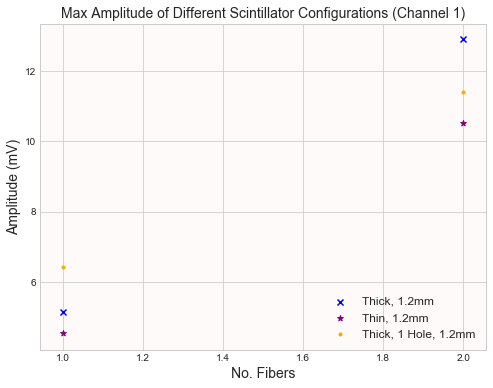

In [5]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

plt.xlabel('No. Fibers', fontsize=14)
plt.ylabel('Amplitude (mV)',fontsize=14)

#plt.xticks([1,2,3,4,5])

# thick, 2 holes
d1 = plt.scatter([1,2], [amps[1], amps[2]], color='blue', marker='x'); thic_21.append(amps[1]); thic_22.append(amps[2])
# thin, 2 holes
d2 = plt.scatter([1,2], [amps[4], amps[5]], color='purple', marker='*'); thin_21.append(amps[4]); thin_22.append(amps[5]); 
# thick, 1 hole
d3 = plt.scatter([1,2], [amps[3], amps[0]], color='orange', marker='.'); thic_11.append(amps[3]); thic_12.append(amps[0])

#plt.ylim(min(amps) * 0.8, max(amps) * 1.1)
plt.title("Max Amplitude of Different Scintillator Configurations (Channel 1)", fontsize=14)
           
#plt.legend((d1, d2, d3), ("Thin, 1.2mm", "Thick, Single 1.2mm", "Thick, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.legend((d1, d2, d3), ("Thick, 1.2mm", "Thin, 1.2mm", "Thick, 1 Hole, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.show()

# Dataset 2

In [6]:
amps = get_amplitudes("dataset2")

0 dataset2/ATT_THIC_1fibre1hole.csv
1 dataset2/ATT_THIC_2fibre2hole.csv
2 dataset2/ATT_THIC_1fibre2hole_lft.csv
3 dataset2/ATT_THIN_1fibre2hole_lft 1.csv
4 dataset2/ATT_THIC_2fibre1hole 0.csv
5 dataset2/ATT_THIN_2fibre2hole 0.csv
6 dataset2/ATT_THIC_1fibre2hole_rgh.csv


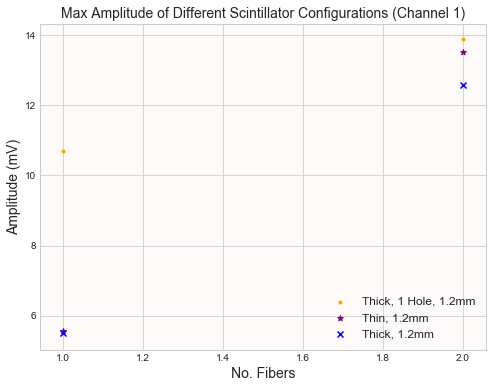

In [7]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

plt.xlabel('No. Fibers', fontsize=14)
plt.ylabel('Amplitude (mV)',fontsize=14)

#plt.xticks([1,2,3,4,5])

# thick, 1 holes
d1 = plt.scatter([1,2], [amps[0], amps[4]], color='orange', marker='.'); thic_11.append(amps[0]); thic_12.append(amps[4])
# thin, 2 holes
d2 = plt.scatter([1,2], [amps[3], amps[5]], color='purple', marker='*'); thin_21.append(amps[3]); thin_22.append(amps[5])
# thick, 2 hole
d3 = plt.scatter([1,2], [amps[2], amps[1]], color='blue', marker='x'); thic_21.append(amps[2]); thic_22.append(amps[1])

plt.title("Max Amplitude of Different Scintillator Configurations (Channel 1)", fontsize=14)
           
plt.legend((d1, d2, d3), ("Thick, 1 Hole, 1.2mm", "Thin, 1.2mm", "Thick, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.show()

# Dataset 3

In [8]:
amps = get_amplitudes("dataset3")

0 dataset3/THIN_2fibre2hole 2.csv
1 dataset3/THIC_2fibre1hole 2.csv
2 dataset3/THIC_1fibre2hole 0.csv
3 dataset3/THIC_1fibre1hole 2.csv
4 dataset3/THIN_1fibre2hole 2.csv
5 dataset3/THIC_2fibre2hole 2.csv


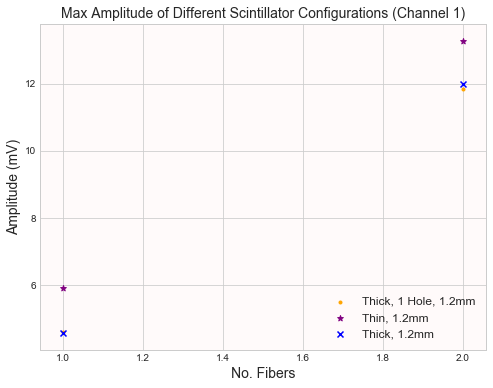

In [9]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

plt.xlabel('No. Fibers', fontsize=14)
plt.ylabel('Amplitude (mV)',fontsize=14)

#plt.xticks([1,2,3,4,5])

# thick, 1 holes
d1 = plt.scatter([1,2], [amps[3], amps[1]], color='orange', marker='.'); thic_11.append(amps[3]); thic_12.append(amps[1])
# thin, 2 holes
d2 = plt.scatter([1,2], [amps[4], amps[0]], color='purple', marker='*');thin_21.append(amps[4]); thin_22.append(amps[0])
# thick, 2 hole
d3 = plt.scatter([1,2], [amps[2], amps[5]], color='blue', marker='x'); thic_21.append(amps[2]); thic_22.append(amps[5])

#plt.ylim(min(amps) * 0.8, max(amps) * 1.1)
plt.title("Max Amplitude of Different Scintillator Configurations (Channel 1)", fontsize=14)
           
#plt.legend((d1, d2, d3), ("Thin, 1.2mm", "Thick, Single 1.2mm", "Thick, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.legend((d1, d2, d3), ("Thick, 1 Hole, 1.2mm", "Thin, 1.2mm", "Thick, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.show()

# Average of all datasets

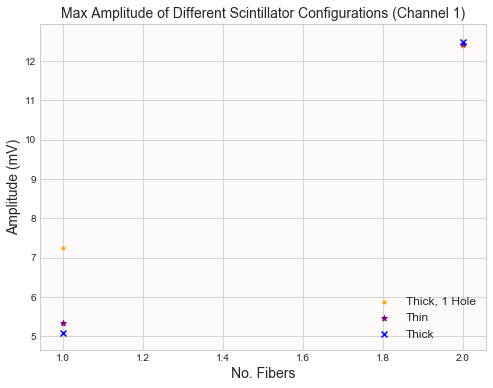

In [10]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

plt.xlabel('No. Fibers', fontsize=14)
plt.ylabel('Amplitude (mV)',fontsize=14)

#plt.xticks([1,2,3,4,5])

# thick, 1 holes
d1 = plt.scatter([1,2], [np.mean(thic_11), np.mean(thic_12)], color='orange', marker='.'); 
# thin, 2 holes
d2 = plt.scatter([1,2], [np.mean(thin_21), np.mean(thin_22)], color='purple', marker='*');
# thick, 2 hole
d3 = plt.scatter([1,2], [np.mean(thic_21), np.mean(thic_22)], color='blue', marker='x'); 

#plt.ylim(min(amps) * 0.8, max(amps) * 1.1)
plt.title("Max Amplitude of Different Scintillator Configurations (Channel 1)", fontsize=14)
           
#plt.legend((d1, d2, d3), ("Thin, 1.2mm", "Thick, Single 1.2mm", "Thick, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.legend((d1, d2, d3), ("Thick, 1 Hole", "Thin", "Thick"), fontsize=12, frameon=False, loc='lower right')
plt.show()